<center>
    <h1><font color=darkred> Tsinghua University </font></h1>
    <h1><font color=darkred> Department of Industrial Engineering </font></h1>
    <h3> Machine Learning and Big-data (30160253) </h3>
    <h4> Fall 2025 </h4>
    <hr>
    <h1> Lab 2: Feature Engineering and Model Training </h1>
    <h3></h3>
</center>

## <center> Case: Students Performance in Exams

## Coding section
### Abstract:

<font face="Times New Roman">In this case, we will explore the relationship between students' Math Scores and other factors, using various data visualizations to present the results. We will employ a multiple linear regression model and create correlation matrix heatmaps, regression plane plots, and residual plots.</font>

<font face="Times New Roman">1. Data processing: We load the student test score data from the Kaggle dataset and use LabelEncoder function to encode categorical variables such as gender, lunch type, etc.</font>

<font face="Times New Roman">2. Model training and prediction: We use the LinearRegression model to fit the training set data and predict the math scores of the test set. Calculate the R-squared and mean square error (MSE) of the model to evaluate the performance of the model.</font>
    
<font face="Times New Roman">3. Visualizing results: (1) Correlation Matrix Heatmap: Use the heatmap function from Seaborn to plot the heatmap of correlations between features to understand the relationships among variables. (2) 3D Regression Plane Plot: Utilize Matplotlib's 3D plotting capabilities to visualize the three-dimensional relationship between Parental Level of Education, Test Preparation Course, and Math Score, comparing actual and predicted values. (3) Residual Plot: Use the residplot function from Seaborn to draw a residual plot for analyzing the model's fit quality.</font>

### Problem Description:
    
<font face="Times New Roman">Assuming we are educational researchers, we aim to understand the relationship between students' Math Scores and the following factors:</font>
* <font face="Times New Roman">Gender</font>
* <font face="Times New Roman">Race/ethnicity</font>
* <font face="Times New Roman">Parental Level of Education</font>
* <font face="Times New Roman">Lunch Type</font></font>
* <font face="Times New Roman">Test Preparation Course</font>

### 1. Data processing

In [1]:
# load Python packages
import pandas as pd  # pip install pandas
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder

In [2]:
# load data
data = pd.read_csv('StudentsPerformance.csv')  # Returns a pandas DataFrame object

In [3]:
# display data
print(data.head())  # Display the first 5 rows of DataFrame

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


#### Please fill in the blank

1) Use the label encoder to encode the features 'lunch' and 'test preparation course'.

2) Use the one-hot encoder to encode the feature 'race/ethnicity'

3) Use the ordinal encoder to encode the feature 'parental level of education'

Hints: If 'df' is a column from a DataFrame, you can use 'df.values.reshape(-1, 1)' to get the numpy array with shape (length of df, 1).

In [4]:
# label encoding
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse_output=False) #scikit-learn version 1.2, using 'sparse_output=False'

gender = label_encoder.fit_transform(data['gender']).reshape(-1, 1)
lunch = label_encoder.fit_transform(data['lunch']).reshape(-1, 1)
course = label_encoder.fit_transform(data['test preparation course']).reshape(-1, 1)


# one-hot encoding
card = len(data['race/ethnicity'].unique()) #cardinality
race = onehot_encoder.fit_transform(data['race/ethnicity'].values.reshape(-1, 1))


# ordinal encoding
ordinal_encoder= OrdinalEncoder(categories = list([['some high school', 'high school','some college',"associate's degree","bachelor's degree","master's degree"]]))
education = ordinal_encoder.fit_transform(data['parental level of education'].values.reshape(-1, 1))


# define independent and dependent variables
X = np.concatenate((gender, lunch,course,race,education),axis = 1) # features
y = data['math score'].values # target

In [5]:
# obtain training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2. Model training and prediction

#### Please fill in the blank
1) Use a k-fold (k=10) cross-validation to tune the hyper-parameter in Lasso Regression, and obtain the best model.

2) Use the best model to predict y on the test set.

3) Calculate R-squared and mean squared error on the test set.

In [6]:
# Using cross-validation to tune the hyper-parameter in Lasso Regression
from sklearn.linear_model import LassoCV

model = LassoCV(cv=10).fit(X_train, y_train)

In [7]:
# Prediction
y_pred = model.predict(X_test)


In [8]:
# Calculate R-squared and mean squared error
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [9]:
print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')

R-squared: 0.18791231191981317
Mean Squared Error: 197.61211867713172


### 3. Visualizing results

In [10]:
import matplotlib.pyplot as plt  # conda install matplotlib
import seaborn as sns  # conda install seaborn
from mpl_toolkits.mplot3d import Axes3D

### 3.1 Correlation Matrix Heatmap
#### Please fill in the blank

1) Draw the Correlation Matrix Heatmap of the DataFrame 'X_df'.

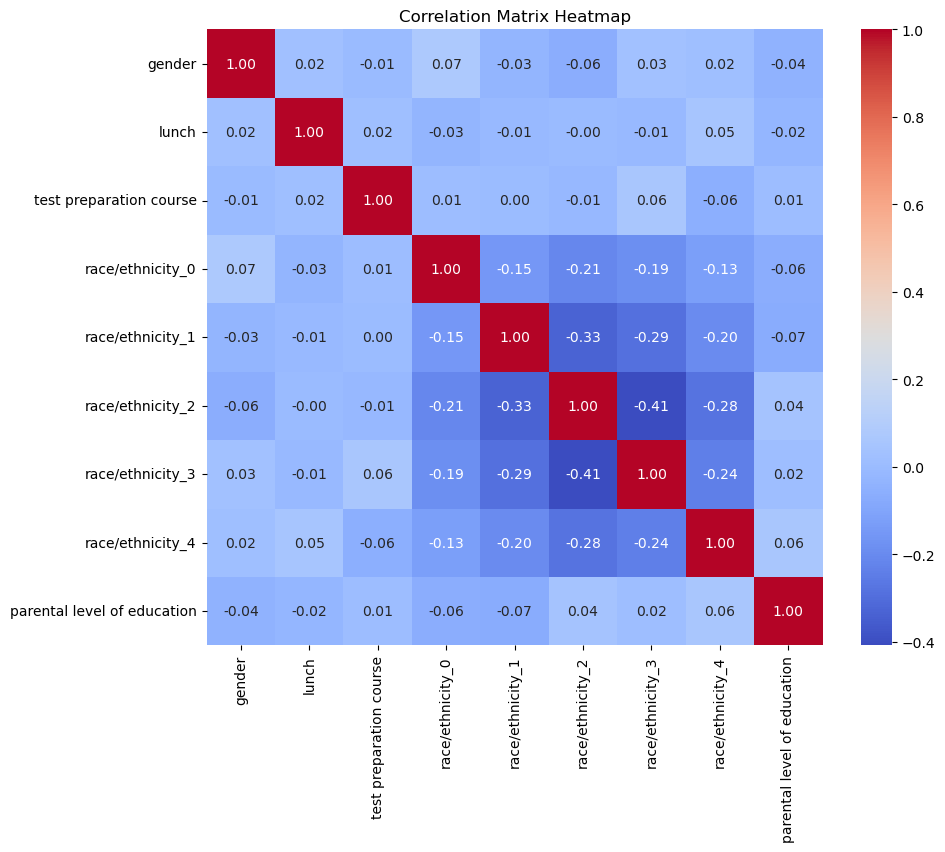

In [11]:
X_columns = ['gender','lunch', 'test preparation course'] + ['race/ethnicity_'+str(i) for i in range(card)] + ['parental level of education']
X_df = pd.DataFrame(X, columns = X_columns)

# Draw the Correlation Matrix Heatmap
X_columns = ['gender','lunch', 'test preparation course'] + ['race/ethnicity_'+str(i) for i in range(card)] + ['parental level of education']
X_df = pd.DataFrame(X, columns = X_columns)

# Plot the Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

### 3.2 3D Regression Plane Plot
#### Please fill in the blank
1) Draw the 3D Regression Plane Plot for the test set.

x-axis: Parental Level of Education

y-axis: Test Preparation Course

z-axis: Math Score

Please use different colors and labels to distinguish the actual data points and the predicted ones.

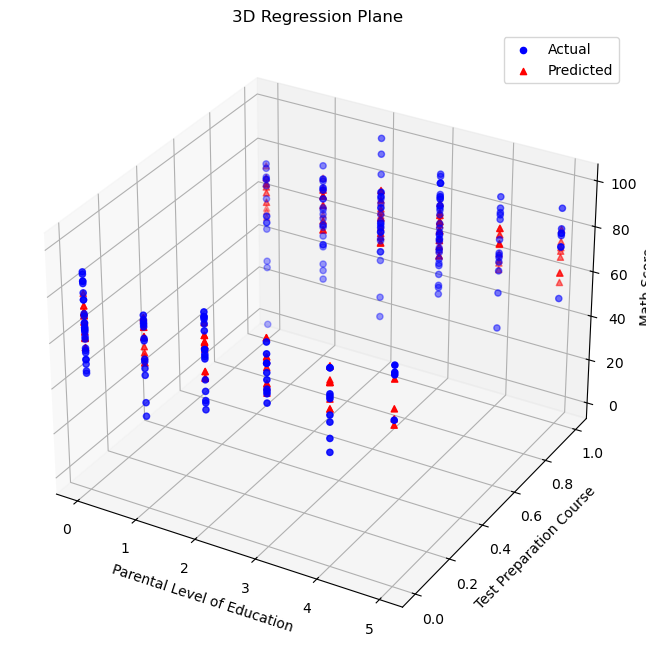

In [12]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:, -1], X_test[:, 2], y_test, color='blue', marker='o', label='Actual')
ax.scatter(X_test[:, -1], X_test[:, 2], y_pred, color='red', marker='^', label='Predicted')
ax.set_xlabel('Parental Level of Education')
ax.set_ylabel('Test Preparation Course')
ax.set_zlabel('Math Score')
ax.set_title('3D Regression Plane')
plt.legend()
plt.show()

### 3.3 Residual Plot
#### Please fill in the blank
1) Draw the Residual Plot for the test set.

x-axis: Predicted Math Score

y-axis: Residuals

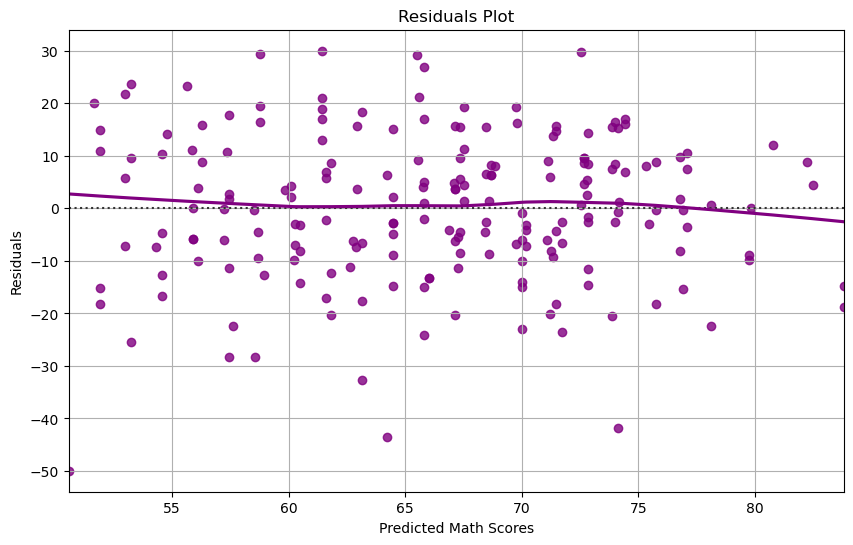

In [ ]:
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color="purple")
plt.title('Residuals Plot')
plt.xlabel('Predicted Math Scores')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [14]:
x1 = [20, 3, 16]
x2 = [5,14,2]

# 假设data是需要标准化的数组（可以是1D或2D数组）
data = np.array([5, 14, 2])

# 计算均值和标准差
mean = np.mean(data)
std = np.std(data)

# 标准化：(x - 均值) / 标准差
standardized_data = (data - mean) / std

print("原始数据：", data)
print("标准化后数据：", standardized_data)
print("标准化后均值：", np.mean(standardized_data))  # 接近0
print("标准化后标准差：", np.std(standardized_data))  # 接近1

原始数据： [ 5 14  2]
标准化后数据： [-0.39223227  1.37281295 -0.98058068]
标准化后均值： 3.700743415417188e-17
标准化后标准差： 1.0
